In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from utils import *
from sequence_utils import *

In [8]:
train = pd.read_csv("../data/train.csv")
print(train.columns)
print(train.shape)

Index(['acoustic_data', 'time_to_failure'], dtype='object')
(629145480, 2)


In [20]:
N_SEQ = 15000
N_TRAIN = 10000
NULL_OFF = 4.5

slices = random_sub_sequence_indexes(train['acoustic_data'], N_SEQ, n=N_TRAIN)
features, target = zip(*[subsequence_to_sample(train[sl]) for sl in slices])

In [21]:
def generate_sequence_features(seq, freq_windows, vari_windows):
    return pd.DataFrame({
        **{
            f"freq_{w}": np.pad(extract_rolling_frequency(seq, n=w), w, mode='constant')[:N_SEQ]
            for w in freq_windows
        },
        **{
            f"vari_{w}": np.pad(extract_rolling_variance(seq, n=w), w, mode='constant')[:N_SEQ]
            for w in vari_windows
        }
    })[max(freq_windows + vari_windows):]

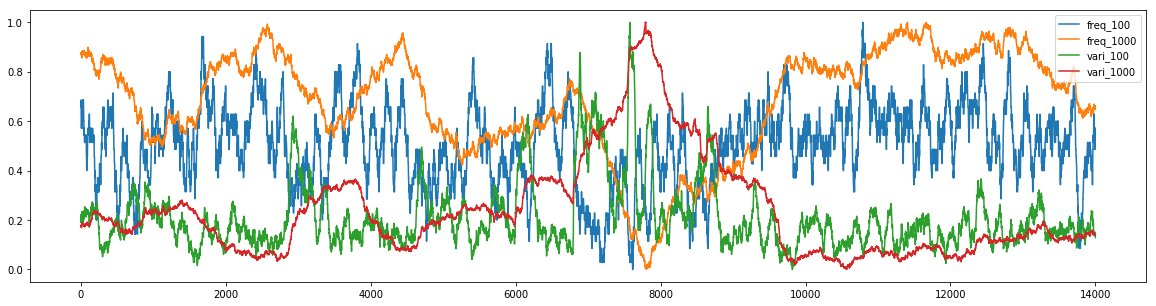

In [23]:
from random import choice
from sklearn.preprocessing import MinMaxScaler

FREQ_WINDOWS = VARI_WINDOWS = [100, 1000]

sequence = choice(features) - NULL_OFF
seq_feats = generate_sequence_features(sequence, freq_windows=FREQ_WINDOWS, vari_windows=VARI_WINDOWS)
seq_feats = pd.DataFrame(MinMaxScaler().fit_transform(seq_feats), columns=seq_feats.columns)

plt.figure(figsize=(20, 5))
for col in seq_feats:
    plt.plot(seq_feats[col], label=col)
    
plt.legend()
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering 

clu = AgglomerativeClustering(n_clusters=10)
clu.fit(seq_feats)
plt.figure(figsize=(20, 5))
plt.scatter(seq_feats.reset_index()['index'], clu.labels_)
plt.show()

In [19]:
%%time
train_feats = generate_sequence_features(train['acoustic_data'],
                                         freq_windows=FREQ_WINDOWS,
                                         vari_windows=VARI_WINDOWS)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/westi/Repos/seismic/env/lib/python3.6/site-packages/IPython/core/magics/execution.py", line 1292, in time
    exec(code, glob, local_ns)
  File "<timed exec>", line 3, in <module>
  File "<ipython-input-10-bc0faeacc2e0>", line 5, in generate_sequence_features
    for w in freq_windows
  File "<ipython-input-10-bc0faeacc2e0>", line 5, in <dictcomp>
    for w in freq_windows
  File "/Users/westi/Repos/seismic/python/sequence_utils.py", line 13, in extract_rolling_frequency
    freq = freq - np.pad(freq, n, mode='constant')[:seq_len]
  File "/Users/westi/Repos/seismic/env/lib/python3.6/site-packages/pandas/core/ops.py", line 1583, in wrapper
    result = safe_na_op(lvalues, rvalues)
  File "/Users/westi/Repos/seismic/env/lib/python3.6/site-packages/pandas/core/ops.py", line 1529, in safe_na_op
    return na_op(lvalues, rvalues)
  File "/Users/westi/Repos/seismic/env/lib/python3.6/site-packages/pandas/core/ops.py", line 1505, in na_op
    r

KeyboardInterrupt: 

In [ ]:
clu = AgglomerativeClustering(n_clusters=10)
clu.fit(train_feats)

In [ ]:
sequence = choice(features) - NULL_OFF
seq_feats = generate_sequence_features(sequence, freq_windows=FREQ_WINDOWS, vari_windows=VARI_WINDOWS)
seq_feats = pd.DataFrame(MinMaxScaler().fit_transform(seq_feats), columns=seq_feats.columns)